# Some basic viz with matplotlib 📊 📈

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pyrsm as rsm
import seaborn as sns

---

In [2]:
df = pd.read_csv("../Data/Final_Vader_Time.csv")

df.shape, df.columns

/var/folders/79/jg9qrvxj5v1_ft3s9qfkpbl40000gn/T/ipykernel_85071/3546707197.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/Final_Vader_Time.csv")


((231306, 19),
 Index(['Author', 'Timestamp', 'Comment', 'Article', 'Game Title', 'Console',
        'Commenter Name', 'Reviewer Type', 'Date Commented', 'Score Number',
        'Release Date', 'Description', 'Game Link', 'Article Link', 'Platform',
        'Title', 'Upvotes', 'Vader_Score', 'Correct_TimeStamp'],
       dtype='object'))

In [3]:
df.head(2)

,Author,Timestamp,Comment,Article,Game Title,Console,Commenter Name,Reviewer Type,Date Commented,Score Number,Release Date,Description,Game Link,Article Link,Platform,Title,Upvotes,Vader_Score,Correct_TimeStamp
0,shaftedman,1 day ago,"IGN Plus... just out of curiosity, does anyone...",daily-deals-the-last-of-us-part-i-spider-man-m...,GameSwitch Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,2024-01-05 00:00:00
1,gamingdevil800,"3 July, 2021",This would be a lot more simplistic if you jus...,video-game-release-dates-ps4-ps5-xbox-one-seri...,GameFinal Fantasy 7 Rebirth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,2021-07-03 00:00:00


In [4]:
df['Correct_TimeStamp'] = pd.to_datetime(df['Correct_TimeStamp'], format='mixed')

In [5]:
df['YearMonth'] = df['Correct_TimeStamp'].dt.to_period('M')

In [6]:
df['YearMonth'].head(2)

0    2024-01
1    2021-07
Name: YearMonth, dtype: period[M]

In [7]:
df['YearMonth'].isnull().sum(),df['YearMonth'].notnull().sum(), df['YearMonth'].shape

(0, 231306, (231306,))

In [8]:
vader_scores_over_time = df.groupby(['YearMonth', 'Vader_Score']).size().unstack(fill_value=0)

In [9]:
vader_scores_over_time = vader_scores_over_time.reset_index()
vader_scores_over_time['YearMonth'] = vader_scores_over_time['YearMonth'].dt.to_timestamp()

In [10]:
filtered_data = vader_scores_over_time[
    (vader_scores_over_time['YearMonth'] >= '2022-10') & 
    (vader_scores_over_time['YearMonth'] <= '2024-02')
]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


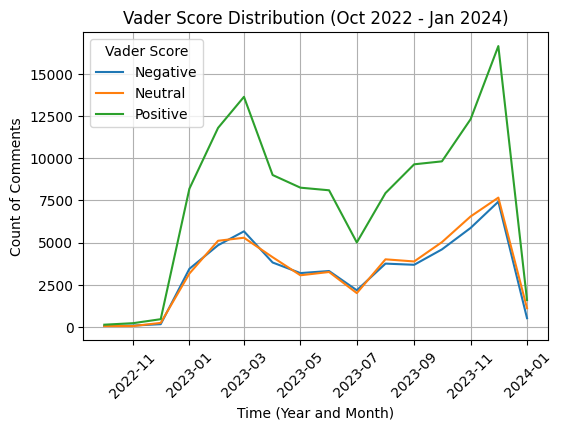

In [11]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='YearMonth', y='value', hue='Vader_Score', data=filtered_data.melt(id_vars='YearMonth'))
plt.title('Vader Score Distribution (Oct 2022 - Jan 2024)')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Count of Comments')
plt.xticks(rotation=45)
plt.legend(title='Vader Score')
plt.grid(True)
plt.show()

---

In [12]:
games_df = pd.read_csv("../Data/Games/ps5_games.csv")

games_df.shape, games_df.columns, games_df.dtypes

((560, 5),
 Index(['Game_Title', 'Genres', 'Developers', 'Publishers', 'Release_date'], dtype='object'),
 Game_Title      object
 Genres          object
 Developers      object
 Publishers      object
 Release_date    object
 dtype: object)

In [13]:
games_df.Release_date = pd.to_datetime(games_df.Release_date)

games_df.dtypes

Game_Title              object
Genres                  object
Developers              object
Publishers              object
Release_date    datetime64[ns]
dtype: object

In [14]:
games_df['Release_date'].where(games_df['Release_date'] > '2022-10-01').count()

174

In [15]:
games_df['Release_date'] = pd.to_datetime(games_df['Release_date'], errors='coerce')
games_df['YearMonth'] = games_df['Release_date'].dt.to_period('M')

games_df_month = games_df.groupby('YearMonth').size().reset_index(name='Game_Releases')

games_df_month.head()

,YearMonth,Game_Releases
0,2020-11,38
1,2020-12,22
2,2021-01,13
3,2021-02,10
4,2021-03,27


In [16]:
games_df_month['YearMonth'] = games_df_month['YearMonth'].dt.to_timestamp()

In [17]:
filtered_games_data = games_df_month[
    (games_df_month['YearMonth'] >= '2022-10') &
    (games_df_month['YearMonth'] <= '2024-02')
]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


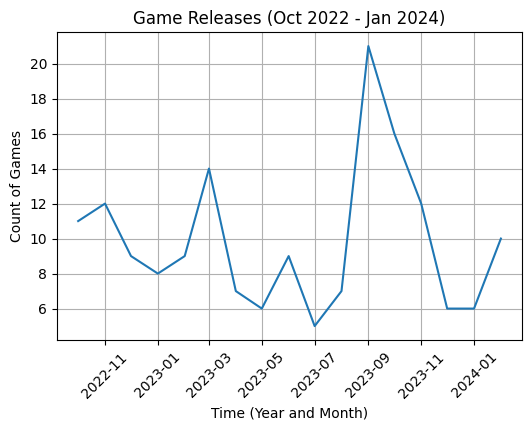

In [18]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='YearMonth', y='Game_Releases', data=filtered_games_data)
plt.title('Game Releases (Oct 2022 - Jan 2024)')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Count of Games')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---
---
---

# La Finale 🏁 🎉

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

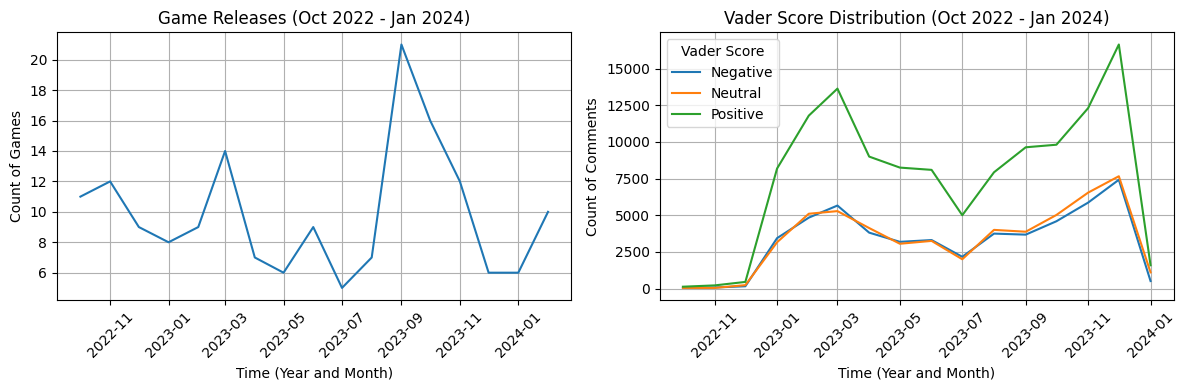

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='YearMonth', y='Game_Releases', data=filtered_games_data, ax=ax1)
ax1.set_title('Game Releases (Oct 2022 - Jan 2024)')
ax1.set_xlabel('Time (Year and Month)')
ax1.set_ylabel('Count of Games')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

sns.lineplot(x='YearMonth', y='value', hue='Vader_Score', data=filtered_data.melt(id_vars='YearMonth'), ax=ax2)
ax2.set_title('Vader Score Distribution (Oct 2022 - Jan 2024)')
ax2.set_xlabel('Time (Year and Month)')
ax2.set_ylabel('Count of Comments')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Vader Score')
ax2.grid(True)

plt.tight_layout()

plt.show()

# Stats 📊

In [20]:
filtered_data

Vader_Score,YearMonth,Negative,Neutral,Positive
96,2022-10-01,56,51,133
97,2022-11-01,80,51,222
98,2022-12-01,163,239,459
99,2023-01-01,3443,3163,8190
100,2023-02-01,4841,5106,11794
101,2023-03-01,5665,5285,13635
102,2023-04-01,3818,4131,9002
103,2023-05-01,3191,3061,8252
104,2023-06-01,3313,3255,8097
105,2023-07-01,2172,2004,5005


In [21]:
filtered_games_data

,YearMonth,Game_Releases
23,2022-10-01,11
24,2022-11-01,12
25,2022-12-01,9
26,2023-01-01,8
27,2023-02-01,9
28,2023-03-01,14
29,2023-04-01,7
30,2023-05-01,6
31,2023-06-01,9
32,2023-07-01,5


In [23]:
stats_df = pd.merge(filtered_data, filtered_games_data, on='YearMonth', how='left')

stats_df

,YearMonth,Negative,Neutral,Positive,Game_Releases
0,2022-10-01,56,51,133,11
1,2022-11-01,80,51,222,12
2,2022-12-01,163,239,459,9
3,2023-01-01,3443,3163,8190,8
4,2023-02-01,4841,5106,11794,9
5,2023-03-01,5665,5285,13635,14
6,2023-04-01,3818,4131,9002,7
7,2023-05-01,3191,3061,8252,6
8,2023-06-01,3313,3255,8097,9
9,2023-07-01,2172,2004,5005,5


In [27]:
linreg = rsm.regress({"Stats_df": stats_df},
                        rvar="Game_Releases",
                        evar=["Negative", "Neutral", "Positive"], # i know this is backyards, just curious to see if we are anticipating public opinion or reacting... looks like PS gots their ish together!
                        )

linreg.summary(vif=True)

Linear regression (OLS)
Data                 : Stats_df
Response variable    : Game_Releases
Explanatory variables: Negative, Neutral, Positive
Null hyp.: the effect of x on Game_Releases is zero
Alt. hyp.: the effect of x on Game_Releases is not zero

           coefficient  std.error  t.value p.value    
Intercept        8.554      2.314    3.696   0.003  **
Negative        -0.006      0.008   -0.661   0.521    
Neutral          0.002      0.005    0.490   0.633    
Positive         0.002      0.002    0.683   0.507    

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.052, Adjusted R-squared: -0.185
F-statistic: 0.221 df(3, 12), p.value 0.88
Nr obs: 16

Variance inflation factors:

              vif    Rsq
Negative  230.947  0.996
Positive   84.140  0.988
Neutral    75.483  0.987


`Negative coefficient on Negative sentiment. although not statistically significant it may suggest that our audience generally likes it when we release games.` big if... not enough data 

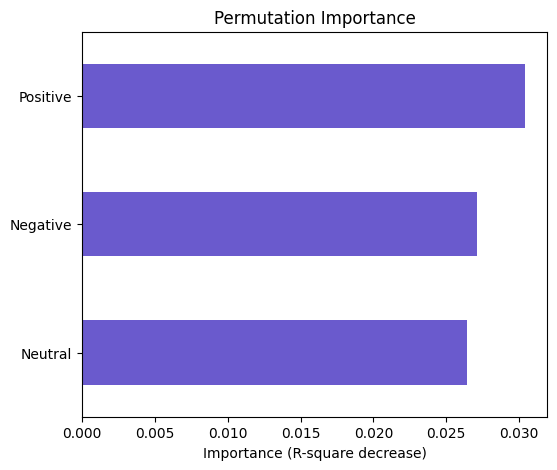

In [30]:
linreg.plot("vimp")  